## ADD TITLE

#### ADD DESCRIPTION OF WHAT NOTEBOOK DOES

### Setup

* only import the modules you need to use

In [59]:
import pandas as pd
from IPython.display import HTML, Markdown, display   # do you use this module?
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import scipy.stats as stats
import statsmodels as sm
import statsmodels.formula.api as smf

### Load dataset

* Drop outliers (`sexpartners` == 1000)

* ? What about the age limit to make dataset more comparable to the teen survey data?

----

* HERE USING THE CLEANED DATA FROM STEP 1

In [22]:
data_clean = pd.read_csv('../data/Judy_PSYC_dataset_clean.csv')

In [23]:
data_clean.shape

(193, 26)

# Question 1
## Is there a statistically significant difference between the number of ideal sexual partners for males and females?

Setting up filters to split the dataset into male and female datasets

In [30]:
female = data_clean["Sex_Female_0_Male1"] == 0
data_female = data_clean[female]

male = data_clean["Sex_Female_0_Male1"] == 1
data_male = data_clean[male]

Setting up to conduct a two-sample t test:


H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

In [31]:
<div class="alert alert-info">



</div>

SyntaxError: invalid syntax (496928786.py, line 1)

<AxesSubplot:xlabel='sex', ylabel='sexpartners'>

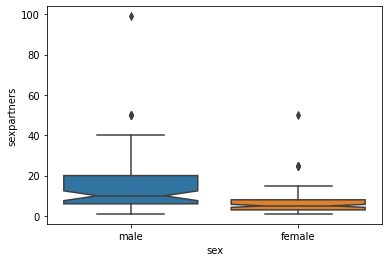

In [32]:
sns.boxplot(x='sex', y='sexpartners', 
            data=data_clean, notch=True)

Calculating the variances between the two measures first:

In [33]:
print(np.var(data_female["sexpartners"]), np.var(data_male["sexpartners"]))

43.229272959183675 239.10958695320835


In [34]:
print(233.34467120181407/41.6044958345303)

5.608640761562746


The ratio between the variances are >4, and as a rule of thumb, the variances do not equal to each other.

Performing two-sample t-test between two samples with different variances.

In [35]:
stats.ttest_ind(a=data_female["sexpartners"], b=data_male["sexpartners"], equal_var=False)

Ttest_indResult(statistic=-4.888773377798691, pvalue=3.832050122430137e-06)

The t test statistic is -4.959580941656057 and the corresponding two-sided p-value is 2.758104295617958e-06.

Therefore, we reject the null hypothesis that the two population means are equal. The p-value of the statstics test is significant. Males and females differ significantly in terms of their ideal number of sexual partners, with females listing way lower numbers than males.

# Question 2
## Is there a statistically significant difference between the placed importance of wealth for males and females?

In [9]:
print(np.var(data_female["Wealth"]), np.var(data_male["Wealth"]))

588.5229100833095 395.79535147392284


In [37]:
### REMEMBER TO ROUND THE RESULTS!

In [38]:
print(round(588.5229100833095/395.79535147392284,2))

1.49


In [11]:
stats.ttest_ind(a=data_female["Wealth"], b=data_male["Wealth"], equal_var=True)

Ttest_indResult(statistic=4.739347579789994, pvalue=4.063660354805862e-06)

The t test statistic is -4.959580941656057 and the corresponding two-sided p-value is 2.758104295617958e-06.

Therefore, we fail to reject the null hypothesis that the two population means are equal. The p-value of the statstics test is significant. Males and females differ significantly in terms of their ideal parter's wealth level, with females caring way more about wealth than males.

# Question 3
## Is there a statistically significant correlation between the placed importance of shared values and political orientation?

<div class="alert alert-warning">

    
* What are `shared_values`? (need more info in your description about questions asked and also the political orientation is on a dichotimized scale

    
* Spell out what the relationship would mean, i.e. a positive relationhsup would mean
    * _As individuals report being more conservative it is more important that they hold the same values as their romantic partner._
    
</div>

array([[<AxesSubplot:title={'center':'Sharedvalues'}>,
        <AxesSubplot:title={'center':'politicalorientation_1extremelyliberal_7extremelyconservative'}>]],
      dtype=object)

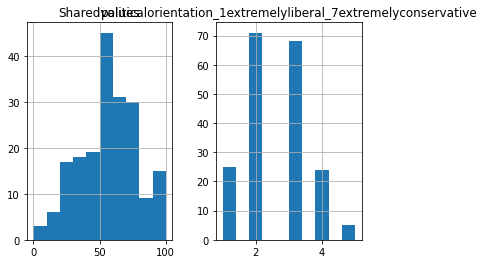

In [42]:
# understanding the variables 
# inspect histograms 

data_clean[['Sharedvalues', 
            'politicalorientation_1extremelyliberal_7extremelyconservative']].hist()

<AxesSubplot:xlabel='politicalorientation_1extremelyliberal_7extremelyconservative', ylabel='Sharedvalues'>

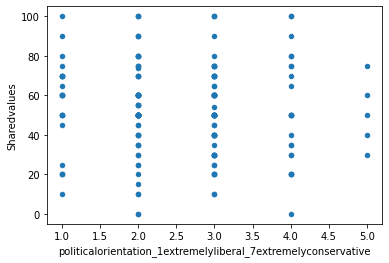

In [44]:
# looking at the relationshiop between the two variables
data_clean.plot(y='Sharedvalues', 
                x='politicalorientation_1extremelyliberal_7extremelyconservative',
                kind='scatter')

In [45]:
# doesn't look like there is a relationship

<AxesSubplot:xlabel='politicalorientation_1extremelyliberal_7extremelyconservative', ylabel='Sharedvalues'>

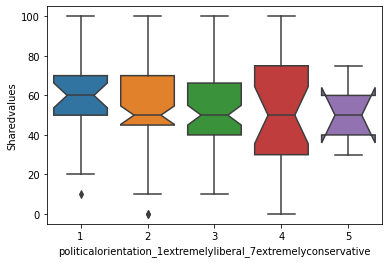

In [50]:
# another view would be a box plot
sns.boxplot(y='Sharedvalues', 
            x='politicalorientation_1extremelyliberal_7extremelyconservative',
            data=data_clean, notch=True)


In [12]:
mod = smf.ols(formula='Sharedvalues ~ politicalorientation_1extremelyliberal_7extremelyconservative', data=data_clean)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sharedvalues   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7936
Date:                Wed, 24 Nov 2021   Prob (F-statistic):              0.374
Time:                        16:56:19   Log-Likelihood:                -912.83
No. Observations:                 202   AIC:                             1830.
Df Residuals:                     200   BIC:                             1836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        56.5892      4.443     12.736      0.000      47.827      65.351
politicalorientation_1extremelyliberal_7extremelyconservative    -1.4638      1.643     -0.891      0.374      -4.704       1.776
==============================================================================
Omnibus:                        0.354   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.838   Jarque-Bera (JB):                0.502
Skew:                           0.004   Prob(JB):                        0.778
Kurtosis:                       2.756   Cond. No.                         8.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Political orientation does not have a statistically meaningful relationship with the placed value on shared values.

# Question 4
## Is there a statistically significant difference between the placed importance of socialattractiveness for people currently in a relationship and singles?

Setting up filters to split the dataset into in a relationship and singles datasets

In [63]:
relationship = data_clean["Relationship_Yes1_No0"] == 1
data_relationship = data_clean[relationship]

# IS THIS CORRECT? - do you want to look at 
# the sex variable or the relationship one?
single = data_clean["Sex_Female_0_Male1"] == 0
data_single = data_clean[single]

In [14]:
print(np.var(data_relationship["socialattractiveness"]), np.var(data_single["socialattractiveness"]))

110.07322668650795 134.7655307382936


In [15]:
print(134.7655307382936/110.07322668650795)

1.2243261580957385


In [16]:
stats.ttest_ind(a=data_relationship["socialattractiveness"], b=data_single["socialattractiveness"], equal_var=True)

Ttest_indResult(statistic=-0.9076964734740546, pvalue=0.365130997896845)

The t test statistic is 0.9076964734740546 and the corresponding two-sided p-value is 0.365130997896845.

Therefore, we fail to reject the null hypothesis that the two population means are equal. The p-value of the statstics test is not significant. Being in a relationship does not make one care more or less about one's ideal partner's social attractiveness.

<div class="alert alert-warning">

* Double check your working above

* Here is another way to do it using `weightstats.ttest_ind` from statsmodels (https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ttest_ind.html)

</div>

<AxesSubplot:xlabel='Relationship_Yes1_No0', ylabel='socialattractiveness'>

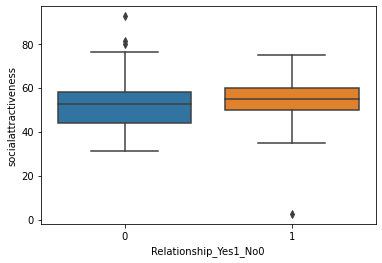

In [72]:
# first plot the data

sns.boxplot(x='Relationship_Yes1_No0',
            y='socialattractiveness',
            data=data_clean
           )

In [74]:
# select the column for the y variable
# and then use your relationship filter

y_socialattract = data_clean['socialattractiveness']

# use three named pointers to capture result
# which is t statistics, p value and dfs
tstat, pvalue, df =  sm.stats.weightstats.ttest_ind(
    x1=y_socialattract[-relationship],
    x2=y_socialattract[relationship])

In [75]:
print(f't={tstat:0.2f} p={pvalue:0.2f} with {df} degrees of freedom')

t=-1.19 p=0.24 with 191.0 degrees of freedom


# Question 5
## If we focus on analyze respondents younger that 30 years old, is there still a statistically significant relationship between the placed importance on wealth and age?

In [17]:
age_filter = data["Age"] <=30
data_age = data[age_filter]

In [19]:
mod = smf.ols(formula='Wealth ~ Age', data=data_age)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Wealth   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.887
Date:                Wed, 24 Nov 2021   Prob (F-statistic):              0.171
Time:                        16:56:23   Log-Likelihood:                -883.00
No. Observations:                 194   AIC:                             1770.
Df Residuals:                     192   BIC:                             1777.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3528     20.394     -0.115      0.908     -42.578      37.872
Age            1.3213      0.962      1.374      0.171      -0.576       3.218
==============================================================================
Omnibus:                       27.399   Durbin-Watson:                   1.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.362
Skew:                           0.946   Prob(JB):                     3.46e-08
Kurtosis:                       3.821   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We here see than under the age of 30, age is not a significant factor in valuing the importance of wealth in a partner.